Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [10]:
!unzip gdrive/MyDrive/CNN_assignment.zip

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

In [11]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [12]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [13]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [14]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, subset='training', 
    batch_size=batch_size, image_size=(img_height, img_width), 
    seed=123, validation_split = 0.2
)
train_ds


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, subset = 'validation', 
    batch_size=batch_size, image_size=(img_height, img_width), 
    seed=123, validation_split = 0.2
)
val_ds

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print("Length of class_names - ",num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Length of class_names -  9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

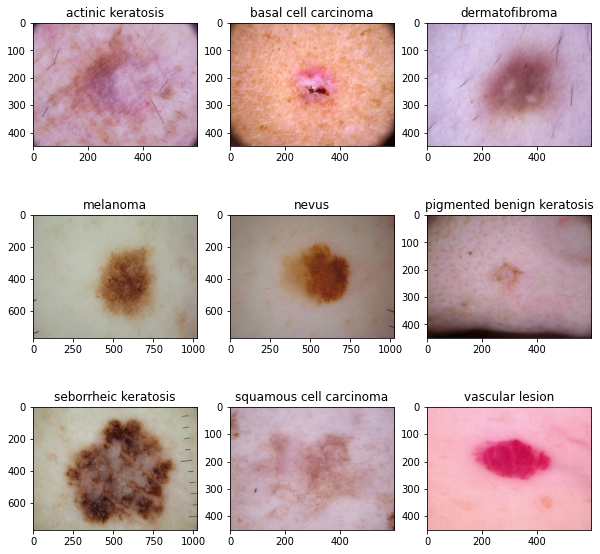

In [17]:
# Plot the graph to visualize the images from each of the 9 classes
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[5]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
### Your code goes here
model = Sequential([
# Rescaling Layer
layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape= (img_height,img_width,3)),
# 1st conv layer and maxpooling layer
layers.Conv2D(32,3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),

#2nd conv and maxpooling layer
layers.Conv2D(64,3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),

#3rd conv and maxpooling layer
layers.Conv2D(128, 3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),

layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 128)       0

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 50s 132ms/step - loss: 2.1208 - accuracy: 0.2500 - val_loss: 1.6744 - val_accuracy: 0.3982
Epoch 2/20
56/56 [==============================] - 4s 74ms/step - loss: 1.7321 - accuracy: 0.3839 - val_loss: 1.5976 - val_accuracy: 0.4609
Epoch 3/20
56/56 [==============================] - 4s 73ms/step - loss: 1.4608 - accuracy: 0.4827 - val_loss: 1.4841 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 4s 72ms/step - loss: 1.3700 - accuracy: 0.5240 - val_loss: 1.4448 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 4s 72ms/step - loss: 1.3337 - accuracy: 0.5268 - val_loss: 1.4746 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 4s 73ms/step - loss: 1.2558 - accuracy: 0.5519 - val_loss: 1.4988 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 4s 72ms/step - loss: 1.1314 - accuracy: 0.6060 - val_loss: 1.3727 - val_accuracy: 0.5526
Epoch 8/20


### Visualizing training results

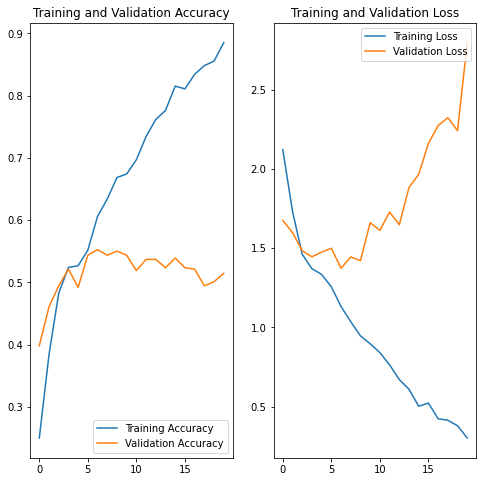

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

We can observe that the model is overfitting( Train - 90% approx and Validation - 50% approx). The training model has memorized all the images and hence performing poorly on the validation set. 
From the plot above, we can see a difference in Training and Validation Loss around 4-5 epoch


In [24]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2, fill_mode = 'reflect'),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.5, 0.3), width_factor=(0.5, 0.3), fill_mode='reflect')
])

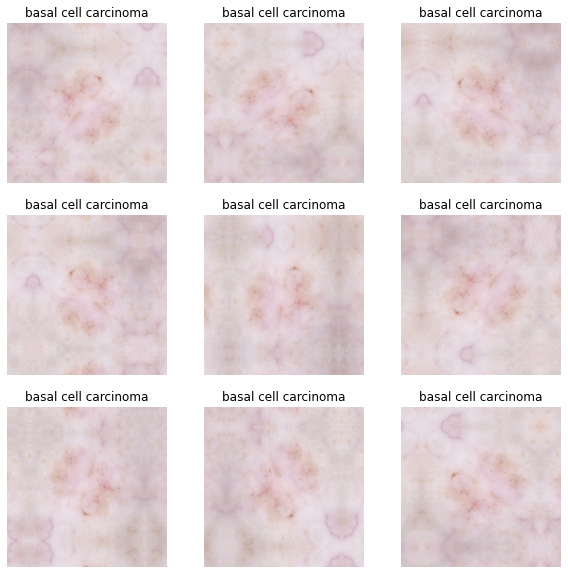

In [25]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        aug_img = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()


### Todo:
### Create the model, compile and train the model


In [26]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([data_augmentation,
# Rescaling Layer
layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape= (img_height,img_width,3)),
# 1st conv layer and maxpooling layer
layers.Conv2D(32,3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),


#2nd conv and maxpooling layer
layers.Conv2D(64,3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),


#3rd conv and maxpooling layer
layers.Conv2D(128, 3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Dropout(0.2),

layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dense(num_classes, activation='softmax')
])

### Compiling the model

In [27]:
### Your code goes here
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [28]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 86ms/step - loss: 2.1023 - accuracy: 0.2433 - val_loss: 1.8490 - val_accuracy: 0.3289
Epoch 2/20
56/56 [==============================] - 5s 81ms/step - loss: 1.7380 - accuracy: 0.3711 - val_loss: 1.6566 - val_accuracy: 0.4004
Epoch 3/20
56/56 [==============================] - 5s 82ms/step - loss: 1.5732 - accuracy: 0.4470 - val_loss: 1.5091 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4933 - accuracy: 0.4743 - val_loss: 1.5398 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4043 - accuracy: 0.4989 - val_loss: 1.6323 - val_accuracy: 0.4541
Epoch 6/20
56/56 [==============================] - 5s 82ms/step - loss: 1.3525 - accuracy: 0.5156 - val_loss: 1.4224 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.3761 - accuracy: 0.5134 - val_loss: 1.4924 - val_accuracy: 0.5011
Epoch 8/20
56

### Visualizing the results

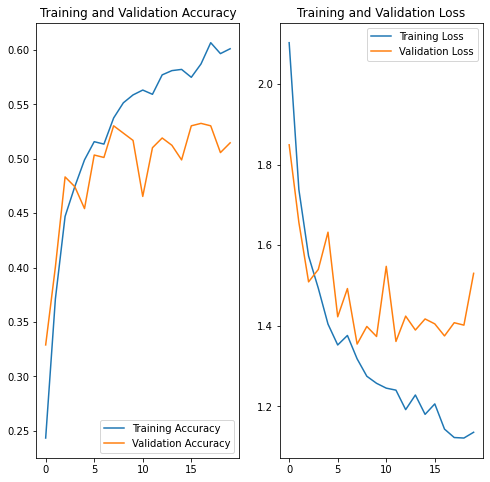

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The Model's overfitting issue is sorted after performing data augmentation. However, the performance of the model has gone too low which is around 60% and 50% on train and validation respectively.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg'))) 

df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts
original_df = df.sort_values(by = 'count', ascending=False)
original_df

,class,count
5,pigmented benign keratosis,462
3,melanoma,438
1,basal cell carcinoma,376
4,nevus,357
7,squamous cell carcinoma,181
8,vascular lesion,139
0,actinic keratosis,114
2,dermatofibroma,95
6,seborrheic keratosis,77


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Ans - Seborrheic keratosis has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Ans - Pigmented benign keratosis, melanoma, basal cell carcinoma and nevu are the dominant classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFF972B2290>: 100%|██████████| 500/500 [00:19<00:00, 26.29 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF95EFA1D0>: 100%|██████████| 500/500 [00:19<00:00, 25.94 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF975B4CD0>: 100%|██████████| 500/500 [00:19<00:00, 25.69 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7EFF97274A10>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7EFF975A3310>: 100%|██████████| 500/500 [01:28<00:00,  5.64 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFF9768D7D0>: 100%|██████████| 500/500 [00:20<00:00, 24.96 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EFF944493D0>: 100%|██████████| 500/500 [00:48<00:00, 10.34 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFF95DD0750>: 100%|██████████| 500/500 [00:19<00:00, 26.30 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0086324350>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [36]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [38]:
new_df['Label'].value_counts()

basal cell carcinoma          500
nevus                         500
dermatofibroma                500
squamous cell carcinoma       500
pigmented benign keratosis    500
vascular lesion               500
seborrheic keratosis          500
melanoma                      500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
## your code goes here
### Your code goes here
model = Sequential([
# Rescaling Layer
layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape= (img_height,img_width,3)),
# 1st conv layer and maxpooling layer
layers.Conv2D(32,3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),

#2nd conv and maxpooling layer
layers.Conv2D(64,3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),

#3rd conv and maxpooling layer
layers.Conv2D(128, 3, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),

layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dense(num_classes, activation='softmax')
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [44]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 32s 182ms/step - loss: 2.0358 - accuracy: 0.2420 - val_loss: 1.5595 - val_accuracy: 0.3734
Epoch 2/30
169/169 [==============================] - 31s 176ms/step - loss: 1.5148 - accuracy: 0.4330 - val_loss: 1.3968 - val_accuracy: 0.4766
Epoch 3/30
169/169 [==============================] - 30s 175ms/step - loss: 1.2515 - accuracy: 0.5408 - val_loss: 1.2382 - val_accuracy: 0.5405
Epoch 4/30
169/169 [==============================] - 30s 174ms/step - loss: 1.0206 - accuracy: 0.6346 - val_loss: 1.0189 - val_accuracy: 0.6125
Epoch 5/30
169/169 [==============================] - 31s 177ms/step - loss: 0.8419 - accuracy: 0.6994 - val_loss: 0.9898 - val_accuracy: 0.6318
Epoch 6/30
169/169 [==============================] - 31s 178ms/step - loss: 0.6591 - accuracy: 0.7665 - val_loss: 0.9028 - val_accuracy: 0.6964
Epoch 7/30
169/169 [==============================] - 31s 178ms/step - loss: 0.5139 - accuracy: 0.8158 - val_loss: 0.8029 - val_ac

#### **Todo:**  Visualize the model results

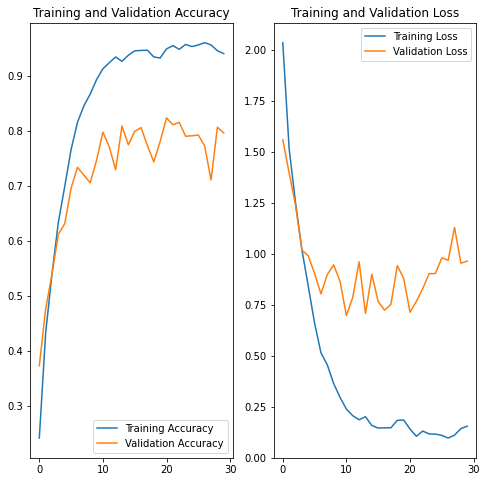

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The performance of the model increased after handling class imbalance. However, the accuracy difference between train and validation set are still high(around 10-15%). We could inlcude deep CNN layers or may be increase the number of epochs to arrive at a good model which is able to generalize well on the validation set.

